# Import libraries

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans

In [6]:
import warnings 
warnings.filterwarnings('ignore')

# Data Frame

In [9]:
df = pd.read_csv("/Users/otahina/Desktop/venv/Personal Project/Source_data.csv")

In [10]:
df.head()

,CustomerID,Name,Gender,Age,Annual Income (€),Spending Score (1-100)
0,1.0,Kyrie Ruiz,Male,19.0,15000.0,39.0
1,2.0,Roman Richardson,Male,21.0,15000.0,81.0
2,3.0,Tyson Lewis,Female,20.0,16000.0,6.0
3,4.0,Riley Butler,Female,23.0,16000.0,77.0
4,5.0,Angelina Gibson,Female,31.0,17000.0,40.0


# Univariate Analysis

In [12]:
df.describe()

,CustomerID,Age,Annual Income (€),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000
std,57.879185,13.969007,26264.721165,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.750000,41500.000000,34.750000
50%,100.500000,36.000000,61500.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,70.000000,137000.000000,99.000000


<AxesSubplot: xlabel='Annual Income (€)', ylabel='Density'>

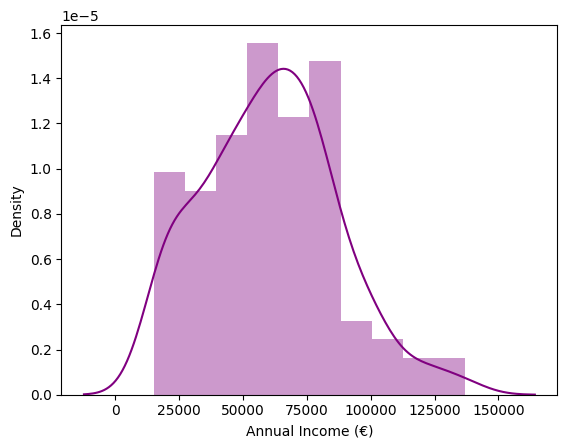

In [14]:
sns.distplot(df['Annual Income (€)'], color='purple')

In [15]:
df.columns

Index(['CustomerID', 'Name', 'Gender', 'Age', 'Annual Income (€)',
       'Spending Score (1-100)'],
      dtype='object')